# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_token_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cpu")
lm = loaded_info["lightning_language_model_no_RE"].to("cpu")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]



In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 5)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.50it/s]

{'mean_acc': {'mean': 0.3112134993076324, 'std': 0.002115962209951692}, 'mean_perplexity': {'mean': 42.02018585205078, 'std': 0.16134313884489157}, 'mean_mask_percentage': {'mean': 0.31423174142837523, 'std': 0.004154719309316542}}
{'mean_acc': tensor(0.3431), 'mean_perplexity': tensor(35.3273, grad_fn=<AddBackward0>), 'mean_mask_percentage': 0}


## Change in perplexity

In [6]:
### Next we test what happens if we check te change in perplexity of the RE. 
from utils.analysis import calc_change_in_perplexity_experiment
change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=2)
change_in_perplexity

{'mean_diff_perplexity': {'mean': -0.00516101773828268,
  'std': 0.04142350366214291}}

## Distribution of mask

In [7]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(63.5423), 'rel_average': tensor(0.5159), 'abs_pos_count': Counter({0.0: 4441, 1.0: 131, 2.0: 127, 21.0: 119, 13.0: 116, 20.0: 114, 10.0: 114, 22.0: 114, 28.0: 112, 19.0: 112, 18.0: 112, 16.0: 112, 12.0: 112, 14.0: 111, 11.0: 110, 17.0: 109, 29.0: 109, 25.0: 109, 15.0: 108, 7.0: 107, 24.0: 107, 23.0: 105, 6.0: 105, 26.0: 103, 4.0: 103, 3.0: 101, 27.0: 100, 9.0: 99, 5.0: 99, 48.0: 94, 46.0: 94, 36.0: 94, 58.0: 94, 60.0: 93, 8.0: 92, 44.0: 92, 42.0: 92, 39.0: 92, 45.0: 91, 33.0: 91, 30.0: 91, 38.0: 91, 61.0: 90, 55.0: 89, 50.0: 89, 49.0: 89, 47.0: 89, 41.0: 88, 40.0: 86, 35.0: 86, 31.0: 86, 51.0: 85, 37.0: 85, 43.0: 85, 59.0: 84, 54.0: 84, 52.0: 84, 32.0: 84, 57.0: 84, 53.0: 83, 34.0: 83, 56.0: 81, 72.0: 73, 68.0: 72, 95.0: 71, 97.0: 70, 65.0: 70, 106.0: 69, 87.0: 69, 93.0: 69, 105.0: 68, 98.0: 68, 90.0: 68, 88.0: 68, 66.0: 68, 80.0: 68, 73.0: 68, 94.0: 67, 85.0: 67, 107.0: 66, 81.0: 66, 79.0: 66, 78.0: 66, 71.0: 66, 96.0: 65, 92.0: 65, 91.0: 65, 104.0: 65, 83.0: 65

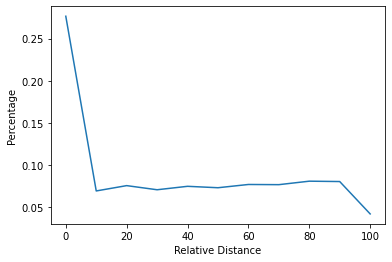

In [27]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

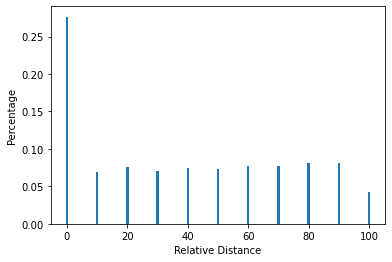

In [29]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

<BarContainer object of 294 artists>

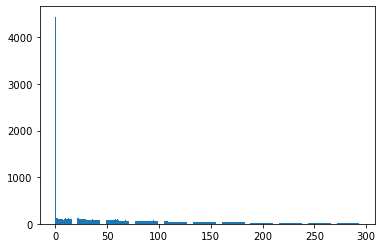

In [9]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.plt(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [30]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [31]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [32]:
from utils.analysis import pretty_print_completed_dialogues

In [33]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] ------> yes , of course . you know , the company is very good and to be honest . and the [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' m afraid i have a lot of things from your home for the first time . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> yes , please . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> you ' re going to have to make sure it has it . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> yes , we could find an offer of a computer . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [M

In [34]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] [MASK] [MASK] doing ? ------> what ’ s wrong with that , jan ##e ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] with [MASK] [MASK] jane ? [SEP] ------> yes , he is . it was very nice for me , but she said we were going to show [SEP]
how are [MASK] doing [MASK] [MASK] [MASK] [MASK] wrong [MASK] that [MASK] jane ? [MASK] [MASK] [MASK] he [MASK] [MASK] [MASK] [MASK] [MASK] nice [MASK] [MASK] [MASK] but [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] ------> i see . [SEP]
[MASK] did [MASK] [MASK] [MASK] [MASK] ------> i don ’ t think you ’ ll enjoy a better present for me . we have been working hard [SEP]
[MASK] did [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] enjoy a [MASK] [MASK] [MASK] me . [MASK] have [MASK] working [MASK] [SEP] ------> really , i guess so . [SEP]
what did [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] a [MASK] [MASK] for [MASK] . [